In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [16]:
def create_data(n_points=100,mean_0=[15,45],mean_1=[35,40],cov=[[20,0],[0,20]]):
    x_0 = np.zeros([n_points,2])
    x_1 = np.zeros([n_points,2])
    x_0 = np.random.multivariate_normal(mean_0,cov,n_points)
    x_1 = np.random.multivariate_normal(mean_1,cov,n_points)
    y_0 = np.zeros([n_points,1])
    y_1 = np.zeros([n_points,1])+1
    return x_0,y_0,x_1,y_1

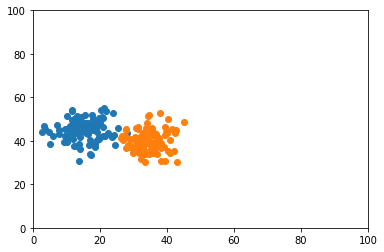

In [21]:
x_0,y_0,x_1,y_1 = create_data()
axes = plt.gca()
axes.set_xlim([0,100]) 
axes.set_ylim([0,100]) 
plt.scatter(x_0[:,0],x_0[:,1])
plt.scatter(x_1[:,0],x_1[:,1])

In [22]:
train_x = np.append(x_0,x_1,axis=0).T
train_x = np.append(train_x,np.zeros([1,train_x.shape[1]])+1,axis=0)
train_y = np.append(y_0,y_1,axis=0)
train_x.shape,train_y.shape

((3, 200), (200, 1))

In [5]:
def sigmoid(x):
    z = 1/(1+np.exp(-x))
    return z

In [6]:
def forward(train_x,w):
    w_new = np.copy(w)
    w_new = w_new.reshape((1,w.shape[0]))
    y = w_new.dot(train_x)
    return sigmoid(y.T)

In [7]:
def Func(train_x,w,train_y):
    #yhat = np.squeeze(forward(train_x,w,b))
    m = train_x.shape[1]
    yhat = forward(train_x,w)
    #cost = -1*np.sum(train_y*np.log(yhat)+(1-train_y)*np.log(1-yhat))/m
    cost = np.sum((train_y-yhat)*(train_y-yhat))/m
    return cost

In [8]:
def init(num=50,param=2,xu=100,xl=0):
    X_init = np.random.uniform(xl,xu,(num,param))
    return X_init
def crossover(X,F,xu,xl):
    num = X.shape[0]
    param = X.shape[1]
    V = np.zeros([num,param])
    r = np.random.randint(0,num,size=(num,3))
    for i in range(num):
        V[i,:] = X[r[i,0],:] + F*(X[r[i,1],:]-X[r[i,2],:])
    
    V[V>xu] = xu
    V[V<xl] = xl
    return V
def mutate(X,V,C):
    num = X.shape[0]
    param = X.shape[1]
    
    U = np.zeros([num,param])
    for i in range(num):
        jrand = np.random.randint(0,param,size=1)
        for j in range(param):
            ran = np.random.rand()
            if ran<C :
                U[i,j] = V[i,j]
            else:
                U[i,j] = X[i,j]
    return U
def update(X,U):
    X_new = np.copy(X)
    num = X_new.shape[0]
    for i in range(num):
        if Func(train_x,X[i,:],train_y)>Func(train_x,U[i,:],train_y) :
        #if ackley(X[i,:])>ackley(U[i,:]) :
            X_new[i,:] = U[i,:]
    return X_new


In [23]:
W_init = init(num=50,param=3,xu=25,xl=-25)
W = np.copy(W_init)
w_hist = []
for t in range(700):
    V = crossover(W,F=1.5,xu=25,xl=-25)
    U = mutate(W,V,C=.7)
    W = update(W,U)
    w_hist.append(W)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


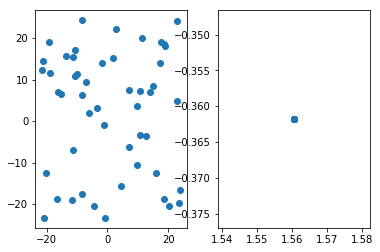

In [26]:
plt.subplot(121)
plt.scatter(W_init[:,0],W_init[:,1])
plt.subplot(122)
plt.scatter(W[:,0],W[:,1])
plt.show()

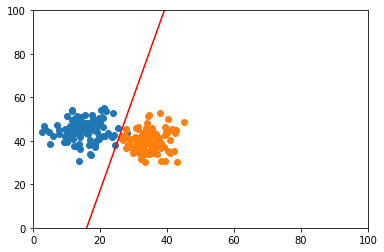

In [27]:
y_pred = -(W[0,0]*np.arange(0,100,1)+W[0,2])/W[0,1]
axes = plt.gca()
axes.set_xlim([0,100]) 
axes.set_ylim([0,100]) 
plt.scatter(x_0[:,0],x_0[:,1])
plt.scatter(x_1[:,0],x_1[:,1])
plt.plot(np.arange(0,100,1),y_pred,color='r')